In [1]:
from openslide import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### showing

In [2]:
pix = 512
svs_path = './WSI/I-2021-4001 A3.svs'
slide = OpenSlide(svs_path)

In [3]:
slide.dimensions 

(63000, 15844)

In [5]:
#31739.4/7980.2, 63000/15844 #comparacion dimensions vs el pto mas alejado en QuPath
len(slide.dimensions), type(slide.dimensions)

(2, tuple)

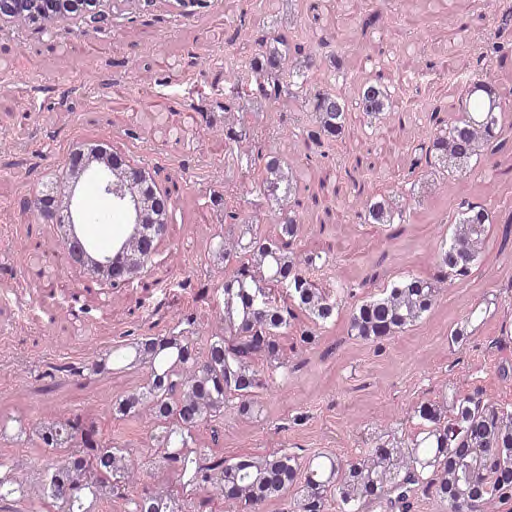

In [8]:
patch = slide.read_region((4000, 13000), 0, (512, 512)).convert('RGB')
patch

In [4]:
def coord(x,y):
    return (int(np.floor(x*63000/31739.4)), int(np.floor(y*15844/7980.2)))

The patch is not blank.


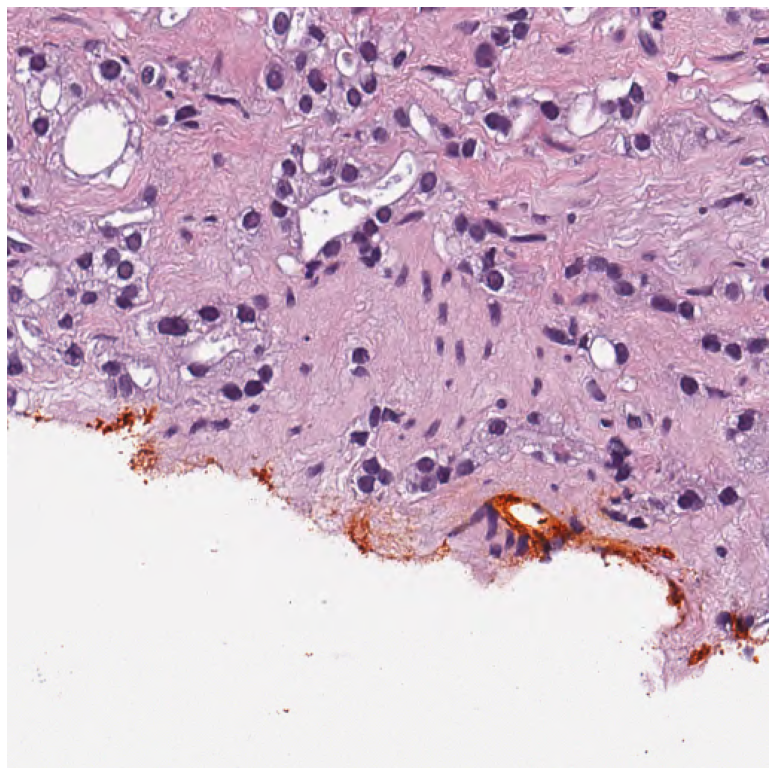

In [5]:
def is_patch_blank(patch):
    gray_patch = patch.convert('L')
    np_patch = np.array(gray_patch)
    average_pixel_value = np.mean(np_patch)
    blank_threshold = 230
    return True if average_pixel_value > blank_threshold else False
    
def show_patch(slide_path, patch_location, patch_size):
    slide = OpenSlide(slide_path)
    patch = slide.read_region(patch_location, 0, patch_size)
    patch_rgb = patch.convert("RGB")
    is_blank = is_patch_blank(patch_rgb)
    print("The patch is blank.") if is_blank else print("The patch is not blank.")
    plt.figure(figsize=(14, 14))
    plt.imshow(patch_rgb)
    plt.axis('off')
    plt.show()
    
pix=512
patch_size = (pix,pix)

slide_path = './WSI/I-2021-4001 A3.svs'
#patch_location = (x,y)
patch_location = coord(2000, 6800) # esos nros de coordenadas son los q aparecen en QuPath
show_patch(slide_path, patch_location, patch_size)

### line 4 line

In [7]:
slide_path = './WSI/I-2021-5616 A4.svs'
slide = OpenSlide(slide_path)
#path_location = (0,0)
path_location = coord(1000,3000)
patch_size = (512,512)
patch = slide.read_region(patch_location, 0, patch_size)

In [8]:
slide.dimensions ## ojo las dim son distintas!

(79199, 21446)

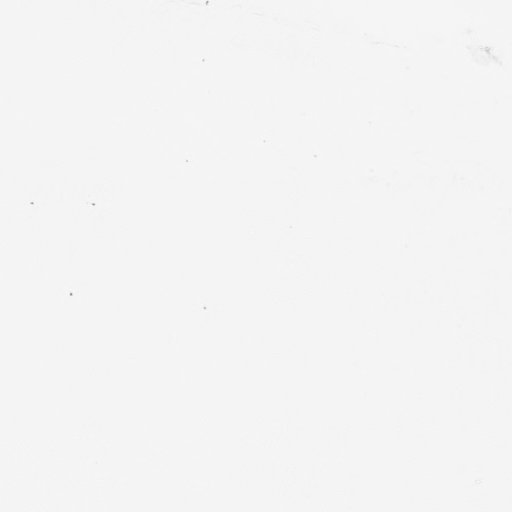

In [9]:
gray_patch = patch.convert('L')
gray_patch

In [10]:
np_patch = np.array(gray_patch)
np_patch

array([[244, 244, 244, ..., 243, 245, 243],
       [243, 244, 244, ..., 245, 244, 244],
       [244, 244, 244, ..., 244, 244, 244],
       ...,
       [244, 244, 244, ..., 245, 242, 245],
       [244, 245, 244, ..., 244, 244, 243],
       [242, 243, 244, ..., 244, 244, 243]], dtype=uint8)

In [11]:
np.min(np_patch), np.mean(np_patch), np.max(np_patch)

(136, 243.91407775878906, 248)

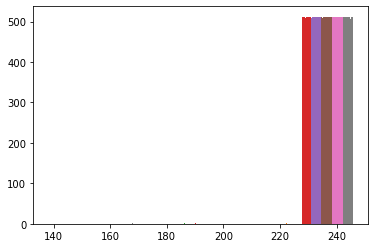

In [12]:
plt.hist(np_patch, bins=5)
plt.show()

In [13]:
def porc(np_patch, treshold):
    return sum(sum([p>treshold for p in np_patch]))/len(np_patch)**2

porc(np_patch, 220) #probar valores cercanos a lo que se aprecia en el histograma

0.9997673034667969

#### checking coordinates

In [14]:
import os   #os.getcwd()
path='./WSI'
files=os.listdir(path) #all files in that folder
files=[f for f in files if f[-3:]=='svs'] #just svs files
for f in files:
    slide = OpenSlide(os.path.join(path,f))
    print(slide.dimensions)

(84600, 14565)
(55799, 7854)
(64799, 16905)
(63000, 15844)
(68400, 12807)
(75600, 17042)
(79199, 21446)


In [15]:
files

['I-2021-5616 A2.svs',
 'I-2021-5616 A3.svs',
 'I-2021-4001 A4.svs',
 'I-2021-4001 A3.svs',
 'I-2021-5616 A1.svs',
 'I-2021-5616 B6.svs',
 'I-2021-5616 A4.svs']

In [40]:
f

'I-2021-5616 A4.svs'

#### checking dim atributes

In [33]:
slide = OpenSlide(os.path.join(path,f))
OpenSlide.detect_format(os.path.join(path,f)) #.svs de aperio

'aperio'

In [31]:
slide.dimensions

(79199, 21446)

In [42]:
slide.dimensions[0]/slide.dimensions[1], 39900/10804

(3.692949734216171, 3.693076638282118)

aqui chekeamos la proporcion micro-mts por pixel

In [56]:
mmp1=0.5038
mmp2=0.50380000000000003
(mmp1*slide.dimensions[0], mmp1*slide.dimensions[1]) , (mmp2*slide.dimensions[0], mmp2*slide.dimensions[1])

((39900.4562, 10804.4948), (39900.4562, 10804.4948))

In [34]:
slide.level_count

4

In [35]:
slide.level_dimensions

((79199, 21446), (19799, 5361), (4949, 1340), (2474, 670))

In [36]:
slide.level_downsamples

(1.0, 4.000262293765456, 16.003754263638363, 32.01074276957975)

In [37]:
slide.associated_images

<_AssociatedImageMap {'label': <PIL.Image.Image image mode=RGBA size=695x700 at 0x7FA0671EC8E0>, 'macro': <PIL.Image.Image image mode=RGBA size=1600x626 at 0x7FA0671EF7C0>, 'thumbnail': <PIL.Image.Image image mode=RGBA size=1024x277 at 0x7FA0A94C7160>}>

In [39]:
print(slide.color_profile)

None


#### checking dim properties

In [18]:
#openslide.PROPERTY_NAME_COMMENT
#openslide.PROPERTY_NAME_VENDOR
#openslide.PROPERTY_NAME_QUICKHASH1
print(slide.properties.get(PROPERTY_NAME_COMMENT, 'No comment available'))

Aperio Image Library v12.0.15 
80960x21546 [0,100 79199x21446] (240x240) J2K/KDU Q=70|AppMag = 20|StripeWidth = 1840|ScanScope ID = SS5699|Filename = I-2021-5616 A4|Date = 11/12/21|Time = 15:44:33|Time Zone = GMT-03:00|User = 3c240e87-a6e9-4791-862e-4a955e64800d|MPP = 0.5038|Left = 16.684452|Top = 19.002005|LineCameraSkew = -0.000123|LineAreaXOffset = 0.021278|LineAreaYOffset = -0.018349|Focus Offset = 0.000000|DSR ID = SS5699|ImageID = 74752|Exposure Time = 109|Exposure Scale = 0.000001|DisplayColor = 0|SessonMode = NR|OriginalWidth = 80960|OriginalHeight = 21546|ICC Profile = ScanScope v1


In [19]:
print(slide.properties.get(PROPERTY_NAME_VENDOR, 'No comment available'))

aperio


In [20]:
print(slide.properties.get(PROPERTY_NAME_QUICKHASH1, 'No comment available'))

bc23f0ad4965f8ff304f36bc7c79e7b61f1daf36c6a9d82d94f2b7a61ed35490


In [21]:
print(slide.properties.get(PROPERTY_NAME_BACKGROUND_COLOR, 'No comment available'))

No comment available


In [22]:
print(slide.properties.get(PROPERTY_NAME_OBJECTIVE_POWER, 'No comment available'))

20


In [54]:
print(slide.properties.get(PROPERTY_NAME_MPP_X, 'No comment available'))

0.50380000000000003


In [25]:
print(slide.properties.get(PROPERTY_NAME_MPP_Y, 'No comment available'))

0.50380000000000003


In [26]:
print(slide.properties.get(PROPERTY_NAME_BOUNDS_X, 'No comment available'))

No comment available


In [27]:
print(slide.properties.get(PROPERTY_NAME_BOUNDS_Y, 'No comment available'))

No comment available


In [28]:
print(slide.properties.get(PROPERTY_NAME_BOUNDS_WIDTH, 'No comment available'))

No comment available


In [52]:
print(slide.properties.get(PROPERTY_NAME_BOUNDS_HEIGHT, 'No comment available'))

No comment available


De momento los atributos de metadatos mas importantes son:
 - PROPERTY_NAME_MPP_X 
 - PROPERTY_NAME_MPP_Y
 - PROPERTY_NAME_COMMENT
 
Los atributos de clase OpenSlide más importantes son:
 - dimensions
 - level_count
 - level_dimensions
 - level_downsamples
 
Los demás no dan info (relevante)

Ahora chekeamos si la proporcion $\mu m$ vs pixel es constante

In [57]:
path='./WSI'
files=os.listdir(path) #all files in that folder
files=[f for f in files if f[-3:]=='svs'] #just svs files
for f in files:
    slide = OpenSlide(os.path.join(path,f))
    print(slide.properties.get(PROPERTY_NAME_MPP_X), slide.properties.get(PROPERTY_NAME_MPP_Y))

0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003
0.50380000000000003 0.50380000000000003


In [74]:
for y in range(0,5,2):
    for x in range(0, 4, 2):
        print(f'x: {x}\t y: {y}')

x: 0	 y: 0
x: 2	 y: 0
x: 0	 y: 2
x: 2	 y: 2
x: 0	 y: 4
x: 2	 y: 4


In [60]:
path+'/'+f

'./WSI/I-2021-5616 A4.svs'

In [ ]:
c=0.5038
def wsi_coord(x,y,c):
    return round(x*c,2), round(y*c,2)

In [82]:
int(round(31411.466425,0))

31411

In [83]:
from time import time

In [97]:
t=time()

In [98]:
print('Process finished: {:.2f} seg '.format(time()-t))

Process finished: 1.64 seg 


In [100]:
(5<10) or (3<5)

True